In [26]:
from sklearn.datasets import fetch_openml
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.multiclass import OneVsRestClassifier
from sklearn.metrics import precision_recall_curve, roc_curve
from sklearn.preprocessing import label_binarize
import pandas as pd
import matplotlib.pyplot as plt
#%matplotlib inline
import pandas as pd
import numpy as np
from numpy import mean
from sklearn.datasets import make_classification
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.ensemble import BaggingClassifier
from sklearn.svm import SVC
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import label_binarize


In [36]:
raw = pd.read_csv('../Data/df_design_matrix.csv')
print(raw.columns)
features = ['RefactoringType', 'L1', 'L2', 'L3', 'L4', 'L5', 'L6']
output = 'AuthorGroup'
df = raw[['RefactoringType', 'L1', 'L2', 'L3', 'L4', 'L5', 'L6', 'AuthorGroup']]

le = {}
for col in features:
    le[col] = preprocessing.LabelEncoder()
    le[col].fit(raw[col])
    df[col] = le[col].transform(raw[col])
le[output] = preprocessing.LabelEncoder()
le[output].fit(['extremely high', 'high', 'medium', 'low'])
df[output] = le[output].transform(raw[output])
X = df[features]
y = df[output]
y = y.astype(np.uint8)
n_classes = len(set(y))
Y = label_binarize(y, classes=[*range(n_classes)])
y = y.astype(np.uint8)
n_classes = len(set(y))

Y = label_binarize(y, classes=[*range(n_classes)])

# X_resampled, y_resampled = ADASYN().fit_resample(X, y)
# print(sorted(Counter(y_resampled).items()))
X_train, X_test, y_train, y_test = train_test_split(X,
                                                    Y,
                                                    random_state = 42)

clf = OneVsRestClassifier(RandomForestClassifier(n_estimators=30,
                             max_depth=30,
                             random_state=0))
clf.fit(X_train, y_train)

y_score = clf.predict_proba(X_test)

Index(['RefactoringType', 'FilePath', 'AuthorName', 'AuthorGroup', 'L1', 'L2',
       'L3', 'L4', 'L5', 'L6'],
      dtype='object')


<ipython-input-36-ee65d4bc0217>:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[col] = le[col].transform(raw[col])
<ipython-input-36-ee65d4bc0217>:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[output] = le[output].transform(raw[output])


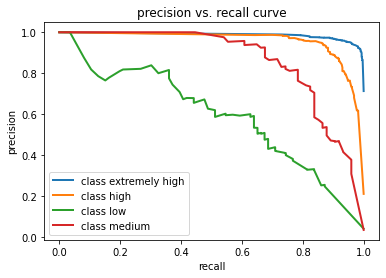

In [37]:
# precision recall curve
precision = dict()
recall = dict()
for i in range(4):
    precision[i], recall[i], _ = precision_recall_curve(y_test[:, i],
                                                        y_score[:, i])
    plt.plot(recall[i], precision[i], lw=2, label='class {}'.format(le[output].inverse_transform([i])[0]))
    
plt.xlabel("recall")
plt.ylabel("precision")
plt.legend(loc="best")
plt.title("precision vs. recall curve")
plt.show()

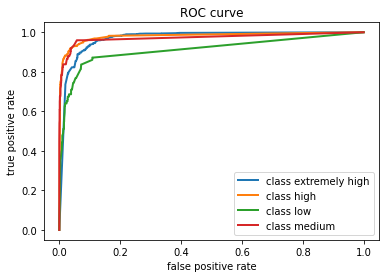